#Import package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, InputLayer
from sklearn.model_selection import train_test_split 

In [2]:
MY_PAST = 24
MY_SPLIT = 0.8
MY_HIDDEN = 300
MY_SHAPE = (MY_PAST, 1)
MY_EPOCH = 400

np.random.seed(3)

#data processing

In [3]:
raw = pd.read_csv('/content/drive/MyDrive/airline.csv', header = None, usecols = [1])
print('original data')
print(raw.head(15))
print(raw.describe())

original data
      1
0   112
1   118
2   132
3   129
4   121
5   135
6   148
7   148
8   136
9   119
10  104
11  118
12  115
13  126
14  141
                1
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000


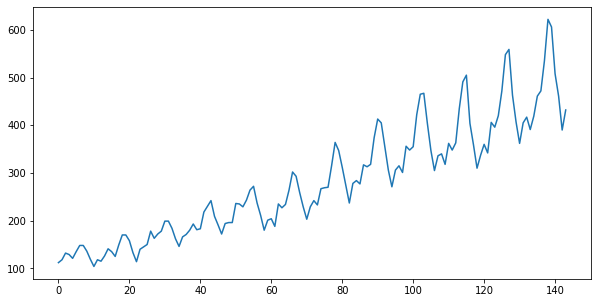

In [4]:
plt.figure(figsize=(10,5))
plt.plot(raw)

In [5]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

raw_DB = scaler.fit_transform(raw)
print('Nomalize data')
print('data type :', type(raw_DB))
print(raw_DB.flatten())

Nomalize data
data type : <class 'numpy.ndarray'>
[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853 0.05984556
 0.08494208 0.08494208 0.06177606 0.02895753 0.         0.02702703
 0.02123552 0.04247104 0.07142857 0.05984556 0.04054054 0.08687259
 0.12741313 0.12741313 0.1042471  0.05598456 0.01930502 0.06949807
 0.07915058 0.08880309 0.14285714 0.11389961 0.13127413 0.14285714
 0.18339768 0.18339768 0.15444015 0.11196911 0.08108108 0.11969112
 0.12934363 0.14671815 0.17181467 0.14864865 0.15250965 0.22007722
 0.24324324 0.26640927 0.2027027  0.16795367 0.13127413 0.17374517
 0.17760618 0.17760618 0.25482625 0.25289575 0.24131274 0.26833977
 0.30888031 0.32432432 0.25675676 0.20656371 0.14671815 0.18725869
 0.19305019 0.16216216 0.25289575 0.23745174 0.25096525 0.30888031
 0.38223938 0.36486486 0.2992278  0.24131274 0.19111969 0.24131274
 0.26640927 0.24903475 0.31467181 0.31853282 0.32046332 0.40733591
 0.5019305  0.46911197 0.4015444  0.32818533 0.25675676 0.33590734
 0.34749035 

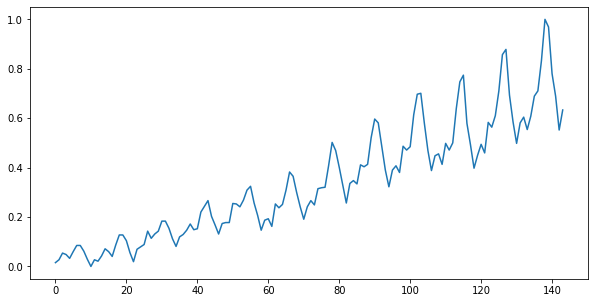

In [6]:
plt.figure(figsize=(10,5))
plt.plot(raw_DB)

In [7]:
#data split
data = []
for i in range(len(raw_DB) - MY_PAST):
  data.append(raw_DB[i:i+MY_PAST+1])

print('---data result---')
print('one data len :', len(data[0]))
print('all data size :', len(data))
print('first data : \n', data[0])

data = np.array(data)  #data type change list to numpy

---data result---
one data len : 25
all data size : 120
first data : 
 [[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]]


In [8]:
#묶음들을 임의로 섞음
np.random.shuffle(data)
print('\n###분할 전 데이터 모양 :',data.shape)

#data split input and output
X_data = data[:,0:MY_PAST] #[:,:] 행렬 데이터분할 앞은 행 뒤는 열.
Y_data = data[:,-1]        #전채 행, 마지막 열
print(X_data.shape)
print(Y_data.shape)

#data split all codeing

split = int(data.shape[0]*MY_SPLIT)
X_train = X_data[:split]
X_test = X_data[split:]
Y_train = Y_data[: split]
Y_test = Y_data[split:]

print('학습용 입력 데이터',X_train.shape)
print('학습용 출력 데이터',Y_train.shape)
print('평가용 입력 데이터',X_test.shape)
print('평가용 출력 데이터',Y_test.shape)

#data split function
#X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size = MY_SPLIT)
#print('학습용 입력 데이터',X_train.shape)
#print('학습용 출력 데이터',Y_train.shape)
#print('평가용 입력 데이터',X_test.shape)
#print('평가용 출력 데이터',Y_test.shape)


###분할 전 데이터 모양 : (120, 25, 1)
(120, 24, 1)
(120, 1)
학습용 입력 데이터 (96, 24, 1)
학습용 출력 데이터 (96, 1)
평가용 입력 데이터 (24, 24, 1)
평가용 출력 데이터 (24, 1)


#RNN MODULE

In [9]:
model = Sequential()
model.add(InputLayer(input_shape = MY_SHAPE))
model.add(LSTM(units=MY_HIDDEN, activation='relu', return_sequences=True))
model.add(LSTM(units=MY_HIDDEN, activation='relu', return_sequences=True))
model.add(LSTM(units=MY_HIDDEN))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=250, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 24, 300)           362400    
_________________________________________________________________
lstm_1 (LSTM)                (None, 24, 300)           721200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense (Dense)                (None, 250)               75250     
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 1,943,051
Trainable params: 1,943,051
Non-trainable params: 0
______________________________________________

#RNN Training

In [10]:
model.compile(optimizer = 'adam', loss = 'mse')
begin = time()
model.fit(X_train, Y_train, epochs = MY_EPOCH, verbose=1)
end = time()
print('train time : {:.2f}sec'.format(end-begin))

Epoch 1/400
3/3 [==============================] - 4s 41ms/step - loss: 0.0518
Epoch 2/400
3/3 [==============================] - 0s 31ms/step - loss: 0.0480
Epoch 3/400
3/3 [==============================] - 0s 40ms/step - loss: 0.0344
Epoch 4/400
3/3 [==============================] - 0s 29ms/step - loss: 0.0223
Epoch 5/400
3/3 [==============================] - 0s 31ms/step - loss: 0.0160
Epoch 6/400
3/3 [==============================] - 0s 28ms/step - loss: 0.0122
Epoch 7/400
3/3 [==============================] - 0s 29ms/step - loss: 0.0134
Epoch 8/400
3/3 [==============================] - 0s 29ms/step - loss: 0.0132
Epoch 9/400
3/3 [==============================] - 0s 30ms/step - loss: 0.0117
Epoch 10/400
3/3 [==============================] - 0s 29ms/step - loss: 0.0166
Epoch 11/400
3/3 [==============================] - 0s 29ms/step - loss: 0.0121
Epoch 12/400
3/3 [==============================] - 0s 29ms/step - loss: 0.0109
Epoch 13/400
3/3 [==============================]

#RNN evaluate

In [11]:
score = model.evaluate(X_test,Y_test, verbose = 1)
print('loss : {:.2f}'.format(score))
#print('acc : ', score[1])  #숫자를 예측하는 문제라 정확도는 의미가 없음

1/1 [==============================] - 1s 593ms/step - loss: 5.8527e-04
loss : 0.00


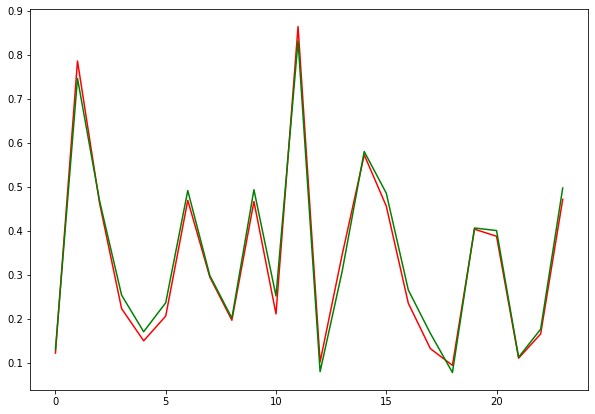

In [12]:
# RNN으로 예측
pred = model.predict(x=X_test)


# 예측 결과 및 정답 그래프 그리기
plt.figure(figsize=(10, 7))
plt.plot(pred, 'r')
plt.plot(Y_test, 'g')

In [13]:
print('역전환 전:', pred)
print(pred.shape)

# 데이터 역전환
pred = scaler.inverse_transform(pred)

print('역전환 후:', pred)
print(pred.shape)

# squeeze 결과
tmp = np.squeeze(pred).astype(int)
print('squeeze 후:', tmp)
print(tmp.shape)

역전환 전: [[0.12333199]
 [0.7865859 ]
 [0.4640454 ]
 [0.22416803]
 [0.15114406]
 [0.2072398 ]
 [0.47013292]
 [0.29581174]
 [0.19785845]
 [0.46753645]
 [0.21227503]
 [0.86478436]
 [0.10323184]
 [0.3467309 ]
 [0.5735834 ]
 [0.45715094]
 [0.23638453]
 [0.13334939]
 [0.0953541 ]
 [0.40459386]
 [0.38856706]
 [0.11167146]
 [0.1667268 ]
 [0.4723931 ]]
(24, 1)
역전환 후: [[167.88597]
 [511.45154]
 [344.37552]
 [220.11903]
 [182.29262]
 [211.35022]
 [347.52884]
 [257.23047]
 [206.49068]
 [346.1839 ]
 [213.95847]
 [551.95825]
 [157.47409]
 [283.6066 ]
 [401.11624]
 [340.8042 ]
 [226.44719]
 [173.07498]
 [153.39343]
 [313.57962]
 [305.27774]
 [161.84581]
 [190.36447]
 [348.69965]]
(24, 1)
squeeze 후: [167 511 344 220 182 211 347 257 206 346 213 551 157 283 401 340 226 173
 153 313 305 161 190 348]
(24,)


In [14]:
# 정답 출력
print('역전환 전 정답:', Y_test)
Y_test = scaler.inverse_transform(Y_test)
print('역전환 후 정답:', Y_test)

역전환 전 정답: [[0.13127413]
 [0.74710425]
 [0.46911197]
 [0.25482625]
 [0.17181467]
 [0.23745174]
 [0.49227799]
 [0.2992278 ]
 [0.2027027 ]
 [0.49420849]
 [0.25289575]
 [0.83204633]
 [0.08108108]
 [0.30888031]
 [0.58108108]
 [0.48648649]
 [0.26640927]
 [0.16795367]
 [0.07915058]
 [0.40733591]
 [0.4015444 ]
 [0.11389961]
 [0.17760618]
 [0.4980695 ]]
역전환 후 정답: [[172.]
 [491.]
 [347.]
 [236.]
 [193.]
 [227.]
 [359.]
 [259.]
 [209.]
 [360.]
 [235.]
 [535.]
 [146.]
 [264.]
 [405.]
 [356.]
 [242.]
 [191.]
 [145.]
 [315.]
 [312.]
 [163.]
 [196.]
 [362.]]
